# CS 109A/AC 209A/STAT 121A Data Science: Homework 5
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [180]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
%matplotlib inline
print 'done'

done


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Mieling, Isabelle

### Part (b): Course Number

CS 109a

### Part (c): Who did you work with?

No one

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

PCA is a better choice for dimension reduction in this problem than step-wise variable selection because step-wise variable selection must go through many choices (step-wise) in order to choose the final variables for the model and with a high-dimensional data set, like the ones we get for image data, this will take a long time. PCA finds the orthogonal directions in which the data exhibits the maximum variance and does not have to try possible combinations of variables like stepwise selection does. PCA allows us to perform automated dimension reduction and this is a much better choice than running through a step-wise variable selection, which will take more time, especially with large image data sets. 

In [181]:
#Load the data
data = np.loadtxt('dataset_1.txt', delimiter=',')

#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

#Print shapes of predictor and response arrays
print 'predictor matrix shape:', x.shape
print 'response array shape:', y.shape

predictor matrix shape: (543, 64)
response array shape: (543,)


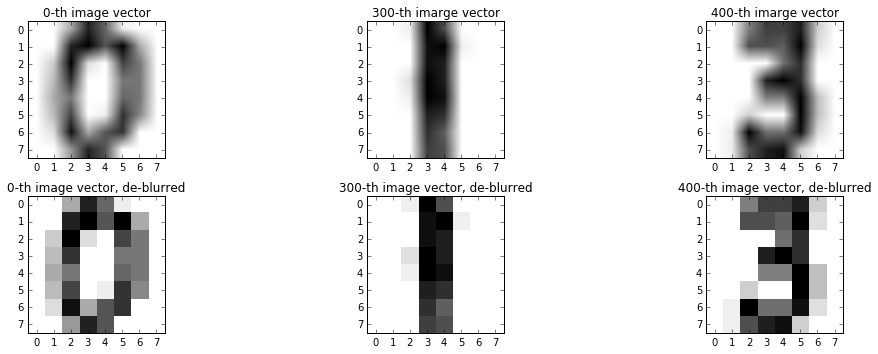

In [182]:
#Plot a couple of images from the dataset
fig, ax = plt.subplots(2, 3, figsize=(15, 5))  # plt.subplots makes a canvas of figure suze figsize and then within 
# this canvas we have a certain number of subplots. (2,3) means 2 rows and 3 columns so we will have 6 plots in tot
 
# imshow displays an image on the axes 

#Plot the 0th image vector
# ax can be either a single axis object or an array of axis objects if more than one subplot was created.
# ax[row, column] of subplot
ax[0, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r) # x is our data and we want the first image so we do x[0]
# we reshape is to the size we want (8,8) and we are using the gray scale so that's our color map
ax[0, 0].set_title('0-th image vector')

#Plot the 300th image vector
ax[0,1].imshow(x[300].reshape(8,8), cmap=plt.cm.gray_r)
ax[0,1].set_title('300-th imarge vector')

#Plot the 400th image vector
ax[0,2].imshow(x[400].reshape(8,8), cmap=plt.cm.gray_r)
ax[0,2].set_title('400-th imarge vector')

#Plot the 0th image vector, with de-blurring
ax[1, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest') # interpolation = nearest 
ax[1, 0].set_title('0-th image vector, de-blurred')


#Plot the 300th image vector, with de-blurring
ax[1, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest') 
ax[1, 1].set_title('300-th image vector, de-blurred')

#Plot the 400th image vector, with de-blurring
ax[1, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest') 
ax[1, 2].set_title('400-th image vector, de-blurred')

plt.tight_layout()
plt.show()

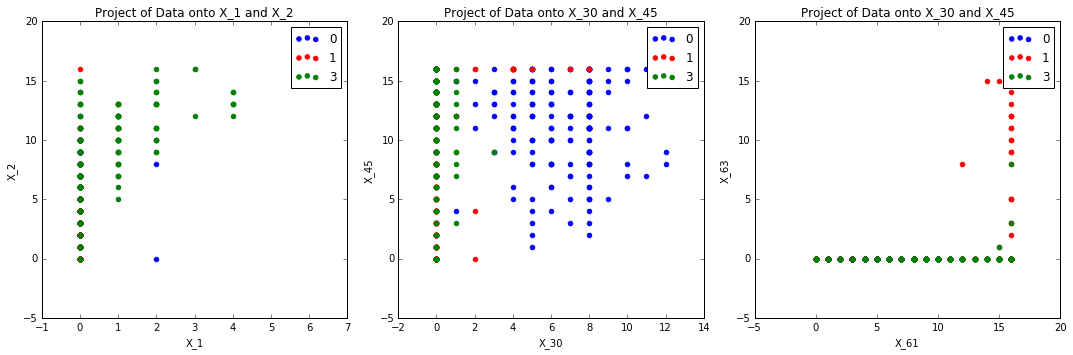

In [183]:
#Let's project the data onto some random 2D planes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Project onto axes: 1, 2
x_2d = x[:, [1, 2]]

ax[0].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[0].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[0].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[0].set_xlabel('X_1')
ax[0].set_ylabel('X_2')
ax[0].set_title('Project of Data onto X_1 and X_2')
ax[0].legend()

#Project onto axes: 30, 45
x_2d = x[:, [30, 45]]

ax[1].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[1].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[1].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[1].set_xlabel('X_30')
ax[1].set_ylabel('X_45')
ax[1].set_title('Project of Data onto X_30 and X_45')
ax[1].legend()

#Project onto axes: PICK TWO RANDOM PREDICTORS
x_2d = x[:, [61, 63]]

ax[2].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[2].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[2].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[2].set_xlabel('X_61')
ax[2].set_ylabel('X_63')
ax[2].set_title('Project of Data onto X_30 and X_45')
ax[2].legend()

plt.tight_layout()
plt.show()

These projections are not useful! The colors are not separated easily. All these projections are really bad! In the sense that they don't seem capture the variation in the data and the classes are not separated when we project (no separation means no good decision surface, which means poor classification)!

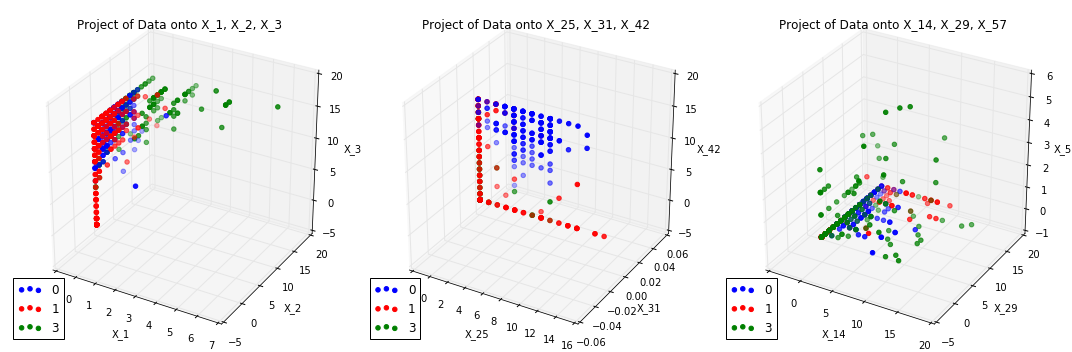

In [184]:
#Let's project the data onto some random 2D planes
fig = plt.figure(figsize=(15, 5))

#Project onto axes: 1, 2, 3
x_2d = x[:, [1, 2, 3]]

ax1 = fig.add_subplot(1, 3, 1,  projection='3d') # 1,3,1 row, columns, position 
# so here we want 1 row, 3 columns, and this ax1 is going in position 1

ax1.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_zlabel('X_3')
ax1.set_title('Project of Data onto X_1, X_2, X_3')
ax1.legend(loc='lower left')

#Project onto axes: 25, 31, 42
x_2d = x[:, [25, 31, 42]]

ax2 = fig.add_subplot(1, 3, 2,  projection='3d')

ax2.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax2.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax2.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax2.set_xlabel('X_25')
ax2.set_ylabel('X_31')
ax2.set_zlabel('X_42')
ax2.set_title('Project of Data onto X_25, X_31, X_42')
ax2.legend(loc='lower left')

#Project onto axes: 14, 29, 57
x_2d = x[:, [14, 29, 57]]

ax3 = fig.add_subplot(1, 3, 3,  projection='3d')

ax3.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax3.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax3.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax3.set_xlabel('X_14')
ax3.set_ylabel('X_29')
ax3.set_zlabel('X_57')
ax3.set_title('Project of Data onto X_14, X_29, X_57')
ax3.legend(loc='lower left')

plt.tight_layout()
plt.show()


Let's now try reducing the number of dimensions in the data using PCA. Why is PCA a valid technique for dimension reduction? Why is PCA appropriate in the context of our task?

In [185]:
from sklearn.decomposition import PCA

<bound method AxesSubplot.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x125fcc3d0>>

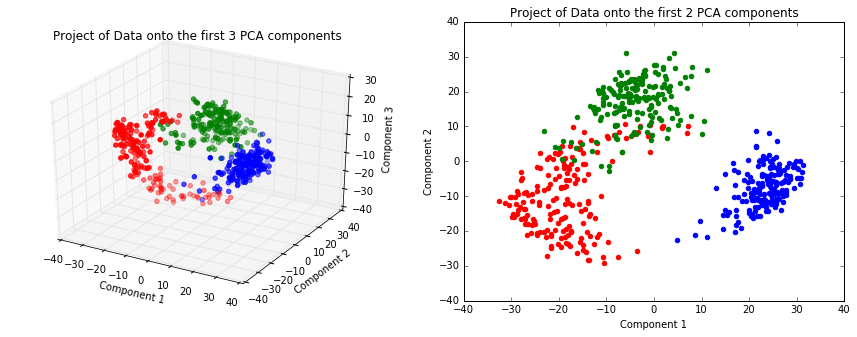

In [186]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

x_reduced = pca.transform(x) # transform: apply dimensionality reduction on x 
# X is projected on the first principal components previous extracted from a training set.
# returns a new x and we just do like what we did above

#Visualized our reduced data : Project to the data onto the three axes
fig = plt.figure(figsize=(15, 5))

#Project onto axes: 1, 2, 3 -- Dont need to do these steps becuase now we have a new x that has the updated columns
# x_2d = x[:, [1, 2, 3]] -- only the columns we need 

ax1 = fig.add_subplot(1, 2, 1,  projection='3d') 
# so here we want 1 row, 3 columns, and this ax1 is going in position 1

ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('Project of Data onto the first 3 PCA components')
ax1.legend

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax1 = fig.add_subplot(1, 2, 2) 

ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_title('Project of Data onto the first 2 PCA components')
ax1.legend

By contruction, the first 2 or 3 components of PCA captures the top 2 or 3 directions of maximum variation. Luckily in our case, the top 2 and 3 components also captures the separation in the classes! In fact, we realize that using 2 components of the PCA already separates all three classes! That means we can get away with using just two (linear combinations of) predictors!
Our predictors are pixels, thus, each PCA component is a combination of different pixels - that is, each PCA component is a digital image! This is good news! It means that the components of the PCA are potentially interpretable.

The smallest possible number of dimensions for PCA that still permits us to perform classification is 2. We can visualize this as we did above in order to verify that subgroups in a dataset are easily classifiable. 

In [187]:
#Display and interpret the principal components of PCA

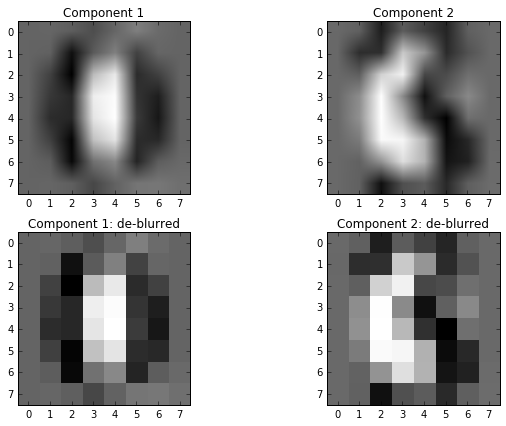

In [188]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))  

# Component 1
ax[0, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r) # x is our data and we want the first image so we do x[0]
ax[0, 0].set_title('Component 1')

# Component 2
ax[0, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r) # x is our data and we want the first image so we do x[0]
ax[0, 1].set_title('Component 2')

# Component 1
ax[1, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest') # x is our data and we want the first image so we do x[0]
ax[1, 0].set_title('Component 1: de-blurred')

# Component 1
ax[1, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest') # x is our data and we want the first image so we do x[0]
ax[1, 1].set_title('Component 2: de-blurred')

plt.tight_layout()
plt.show()

The first component looks like the digit 0 and the second looks like the digit 3! 

Look at our data projected onto the first two components: 

1. nearly all the data points corresponding to 0 are expressed as **a combination of a positive multiple of component 1 and a negative multiple of component 2**;

2. nearly all the data points corresponding to 3 are expressed as **a combination of a negative multiple of component 1 and a positive multiple of component 2**;

3. Nearly all the data points corresponding to the digit 1 is expressed as **a negative combination of the two components**.

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

In [189]:
# implementing logistic regression using sklearn
from sklearn.linear_model import LogisticRegression as LogReg
# coefficients for predictors are given by log.coef_
# intercept is given by log.intercept_

In [190]:
###Build a classifier to distinguish between 0 and 1

#Remove all instances of class 3
x_binary = x_reduced[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg()
logistic_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 3

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 3
logistic_13 = LogReg()
logistic_13.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 3

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 3
logistic_03 = LogReg()
logistic_03.fit(x_binary, y_binary)

#Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced)
y_pred_13 = logistic_13.predict(x_reduced)
y_pred_03 = logistic_03.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

#Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.935543278085


### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

As given above, the accuracy of the fit of the model on the reduced dataset is 0.936. This is a very strong R^2 value however, this accuracy may not necessarily be meaningful. R^2 values are increased when we add more variables to the model, even if the variables are not increasing the fit of the model. It is possible to have an R^2 value equal to 1 if we include as many covariates as observations in the model but this leads to overfitting and does not give us any meaninful information. Therefore, we have to be careful in analyzing what a high accuracy rate means in terms of a good classifier. 

There many ways to verify the meaningfulness of our metrics (like R^2 and accuracy rate), in this case, since the reduced data is low dimensional, we can visually check the "goodness" of our classifier. I.e. we can plot our data and visualize the decision boundaries (the lines on which logistic regression rely to separate one class from another). Visualization of the decision surfaces is useful because we can see directly whether or not the model separates the data into distinct classes. As we can see below, the 0 vs 1, 1 vs 3, and 0 vs 3 decision boundaries separate the classes well. Unlike an R^2 or other numerical score, visualization can tell you whether a decision boundary separates data into distinct classes. This is crucial in a classification problem becuase a "good" model (i.e. R^2 value ~1) may not lead to a good classifier that can be used. 

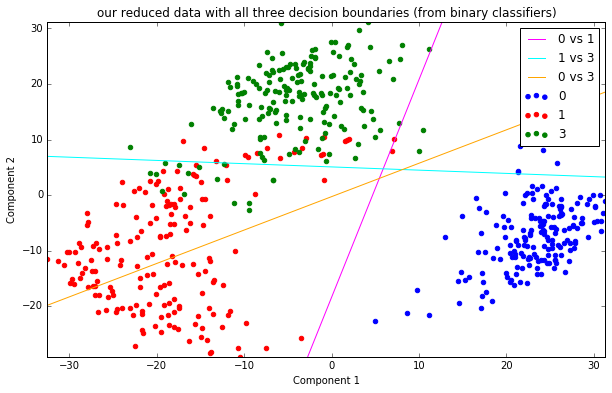

In [191]:
#--------  fit_and_plot_model
# A function to fit a binary LogReg model and visualize it
# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced[:, 0])
    x_1 = np.max(x_reduced[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#Scatter plot of our data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='b', label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='r', label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], color='g', label='3')

#Plot decision boundaries for 0 vs 1
plot_model(logistic_01, ax, '0 vs 1', 'magenta')
#Plot decision boundaries for 1 vs 3
plot_model(logistic_13, ax, '1 vs 3', 'cyan')
#Plot decision boundaries for 0 vs 3
plot_model(logistic_03, ax, '0 vs 3', 'orange')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced[:,0]), np.max(x_reduced[:,0])])
ax.set_ylim([np.min(x_reduced[:,1]), np.max(x_reduced[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()

 Though our simple and naive classifier was enough to classify data into 3 classes, as the number of classes increases, the number of decision boundaries increases as well as the minimum number of PCA components needed to fulfill the task. With 3 classes and the minimum 2 PCA components necessary to classify data, we had to fit 3 logistic regression models. If there were 100 classes and possibly a minimum of 4 PCA components necessary for classificiation, we would have to manually fit various models with combinations of 4 of the 100 classes at a time. This is labor intensive and surely not the most efficient way to make a classifier. Also, as we needed only 2 PCA components for the classification model, we were able to plot and visualize the models. Therefore, multi-class classification has the drawback that it cannot be visualized as we increase the number of classes and PCA components and as these increase, the process becomes labor intensive. 

A possibly better alternative for fitting a multi-class model might be something like K-Nearest Neighbors where there is a training and testing set and a data point is put into a category based on it's K-Nearest Neighbors. We might also use a package already included in Python. In the multiclass case for sklearn's Logistic Regression, the training algorithm uses the one-vs-rest scheme or the cross-entropy loss.  

## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

In [192]:
data = np.loadtxt('dataset_2.txt',dtype='string', delimiter='\r')
data= data[1:] # get rid of header
length = len(data)
print length

1382


In [193]:
for post in data:
    if len(post) < 20:
        print "remove"
      
#TO PANDAS DATAFRAME
print 'Converting to Data Frame'
pos_neg =[]
post = []
for line in data:
    pos_neg.append(line.split(',')[0])
    post.append(line.split(',')[1])
    df = pd.DataFrame({'pos_neg':pos_neg[1:],'post':post[1:]})

# for post in data:
#     line = post.split(',')
#     print line[0] 
print df.head(10)
print len(df)

Converting to Data Frame
  pos_neg                                               post
0     Neg   The last business trip  I drove to San Franci...
1     Neg   My husband and I purchased a 1990 Ford F250 a...
2     Neg   I feel I have a thorough opinion of this truc...
3     Neg   AS a mother of 3  all of whom are still in ca...
4     Neg   The Ford Winstar is a car that I would not re...
5     Neg   We bought this van in 1999  after having been...
6     Neg   I bought the Focus wagon for it s cargo space...
7     Neg   You ve probably heard about the giant 2000 Fo...
8     Neg   If you thought that the GMC Chevrolet Suburba...
9     Neg   I went for a test drive in a 2000 Excursion w...
1381


In [194]:
from sklearn.feature_extraction.text import CountVectorizer
# using countvectorizer, turn each post into a vector of features

In [195]:
take = pd.read_csv('dataset_2.txt', delimiter=',')
take.head(10)

,class,text
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...
5,Neg,The Ford Winstar is a car that I would not re...
6,Neg,We bought this van in 1999 after having been...
7,Neg,I bought the Focus wagon for it s cargo space...
8,Neg,You ve probably heard about the giant 2000 Fo...
9,Neg,If you thought that the GMC Chevrolet Suburba...


In [196]:
vectorizer = CountVectorizer(stop_words=['and', 'or', 'before', 'a', 'an', 'the'], min_df=4)
corpus = take['text'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = take['class'].values

x_train = x[0:length*0.7]
y_train = y[0:length*0.7]

x_test = x[length*0.7:]
y_test = y[length*0.7:]

/Users/isabelle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/isabelle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/isabelle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/isabelle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [197]:
vectorizer.get_feature_names()

[u'00',
 u'000',
 u'01',
 u'02',
 u'03',
 u'04',
 u'05',
 u'0l',
 u'10',
 u'100',
 u'1000',
 u'100k',
 u'105',
 u'106',
 u'108',
 u'10k',
 u'11',
 u'110',
 u'1100',
 u'115',
 u'12',
 u'120',
 u'1200',
 u'120k',
 u'121',
 u'125',
 u'13',
 u'130',
 u'134a',
 u'135',
 u'14',
 u'140',
 u'1400',
 u'145',
 u'146',
 u'146d',
 u'146ll',
 u'146m',
 u'146re',
 u'146s',
 u'146t',
 u'146ve',
 u'148',
 u'15',
 u'150',
 u'1500',
 u'15000',
 u'150s',
 u'155',
 u'15k',
 u'16',
 u'160',
 u'1600',
 u'16k',
 u'16th',
 u'17',
 u'170',
 u'175',
 u'18',
 u'180',
 u'1800',
 u'185',
 u'18mpg',
 u'19',
 u'190',
 u'193',
 u'195',
 u'1964',
 u'1969',
 u'1970',
 u'1979',
 u'1980',
 u'1981',
 u'1985',
 u'1986',
 u'1987',
 u'1988',
 u'1989',
 u'1990',
 u'1991',
 u'1992',
 u'1993',
 u'1994',
 u'1995',
 u'1996',
 u'1997',
 u'1998',
 u'1999',
 u'19k',
 u'1st',
 u'20',
 u'200',
 u'2000',
 u'2001',
 u'2002',
 u'2003',
 u'2004',
 u'2005',
 u'200hp',
 u'201',
 u'205',
 u'20k',
 u'20s',
 u'21',
 u'215',
 u'22',
 u'220',
 u

In [198]:
#C = 1
log = LogReg(C=1.0)
log.fit(x_train, y_train)
log.predict(x_test)

array(['Neg', 'Pos', 'Pos', 'Neg', 'Pos', 'Pos', 'Pos', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg', 'Pos', 'Neg', 'Neg',
       'Neg', 'Pos', 'Pos', 'Neg', 'Neg', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Neg', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Neg', 'Pos', 'Neg', 'Pos', 'Neg', 'Pos', 'Neg', 'Neg',
       'Pos', 'Pos', 'Neg', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Neg', 'Neg', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Neg', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Neg', 'Pos', 'Pos',
       'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos', 'Neg', 'Pos',
       'Pos', 'Pos', 'Pos', 'Neg', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Neg', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Neg', 'Pos', 'Neg', 'Neg',
       'Pos', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg', 'Pos',
       'Pos', 'Pos',

In [199]:
print log.coef_
print log.intercept_
print "Score : " , log.score(x_test,y_test) 

[[-0.03869566  0.01912314  0.04425515 ..., -0.13482766  0.03492516
  -0.00866602]]
[-0.45515444]
Score :  0.626506024096


In [200]:
# C = 10
log = LogReg(C=10.0)
log.fit(x_train, y_train)
log.predict(x_test)
print log.coef_
print log.intercept_
print "Score : " , log.score(x_test,y_test)

[[-0.05879511  0.06696793  0.05933932 ..., -0.21303191  0.06334422
  -0.01187636]]
[-0.68014695]
Score :  0.64578313253


In [201]:
# C = 25
log = LogReg(C=25.0)
log.fit(x_train, y_train)
log.predict(x_test)
print log.coef_
print log.intercept_
print "Score : " , log.score(x_test,y_test)

[[-0.0703802   0.09220195  0.06590089 ..., -0.24431661  0.07544252
  -0.012836  ]]
[-0.77158351]
Score :  0.64578313253


In [202]:
# C = 50
log = LogReg(C=50.0)
log.fit(x_train, y_train)
log.predict(x_test)
print log.coef_
print log.intercept_
print "Score : " , log.score(x_test,y_test)

[[-0.07855284  0.10847057  0.07120471 ..., -0.26685739  0.08337084
  -0.01352731]]
[-0.84348493]
Score :  0.648192771084


In [203]:
# C = 150
log = LogReg(C=150.0)
log.fit(x_train, y_train)
log.predict(x_test)
print log.coef_
print log.intercept_
print "Score : " , log.score(x_test,y_test)

[[-0.09650045  0.12706643  0.08847794 ..., -0.2868949   0.08798561
  -0.01515284]]
[-0.97676677]
Score :  0.648192771084


In [204]:
# C = 500
log = LogReg(C=500.0)
log.fit(x_train, y_train)
log.predict(x_test)
print log.coef_
print log.intercept_
print "Score : " , log.score(x_test,y_test)

[[-0.1050539   0.14099275  0.09545665 ..., -0.30883112  0.09467016
  -0.01631746]]
[-1.05621967]
Score :  0.650602409639


In [205]:
# C = 5000
log = LogReg(C=5000.0)
log.fit(x_train, y_train)
log.predict(x_test)
print log.coef_
print log.intercept_
print "Score : " , log.score(x_test,y_test)

[[-0.10996192  0.14848456  0.09939228 ..., -0.32142677  0.09848708
  -0.01699617]]
[-1.10104378]
Score :  0.650602409639


** Sentiment Analysis Proposal ** 

Goal: Given a new post about an automobile, the goal is to predict if the sentiment expressed in the new post is positive or negative. We will be implementing a regularized logistic regression model. 


Data Collection & Cleaning 
The data comes from a dataset containing 1,382 posts containing textual opinions about Ford automobiles along with labels indicating whether the opinion expressed is positive or negative. This dataset was collected from the review section of a website for Ford automobiles. Reviews were voluntarily written by Ford customers and are reviewed before being posted to the public. Initial data cleaning and data preprocessing was required before fitting a model to the dataset. This involved removing incomplete posts containing less than 20 characters and removing words that are not relevant (i.e. ‘and’, ‘or’, ‘a’, etc). Data cleaning also involved removing any unnecessary characters however, this dataset did not contain any extra characters or symbols and there were no entries with less than 20 characters. Therefore, after initial preprocessing, the dataset contained 1,382 simplified posts (no irrelevant words, no punctuation, etc.). 


Data Exploration & Modeling
	After pre-processing the data, data exploration is an important step before fitting a model. In this study, this included visualizing what words were used in the posts as well as quantifying how many negative and positive posts there were. Doing this gave us a better sense of the data. In order to properly model the data, we split it into training and testing sets. We used the training set to fit a model and the testing set to validate the model as well as compare the fits of various models. We used a regularized logistic regression model. Regularized logistic regression models include a tuning/penalty factor, which is another factor of the model we aimed to select. We chose some estimates for this penalty factor and tested them as well as used a build-in function to determine the best penalty factor. After fitting the regularized logistic regression models to the training data with a selected penalty factor, we then compared the fits of the various models on the testing datasets. Following this modeling step, we were able to make some initial analysis about the results as well as the predictive probability of the model in determining sentiment expressed in a new post. 


Analysis & Visualization
   In fitting models to the training data set, we used various values for the penalty parameter: 1.0, 10.0, 25.0, 50.0, 150.0, 500.0, 5000.0. These resulted in different models for the data as well as different score values. A score values was calculated for each of the models based on its prediction accuracy for the testing set. A score value close to 1 indicates a good fit of the model for the data. A tuning parameter of 1 resulted in a score value of 0.627, that for 10 a score value of 0.646, that for 25 a score value of 0.648, and that for 150 a score value of 0.648. As the tuning/penalty parameter increases from 1 to 150, we see a corresponding increase in score value until it stabilizes at 0.648. As we increase the parameter to 500 and 5,000, the resulting score values continue to increase to 0.651 and stabilize again at this value. Thus, the best value for the tuning parameter is C=500. The regularized logistic regression model then gives the corresponding coefficients for the model, which can then be used to predict underlying tone of textual data for Ford automobiles. 


## Challenge Problem: Automated Medical Diagnosis

In this problem, you are going to build a model to diagnose heart disease. 

The training set is provided in the file ``dataset_3_train.txt`` and there are two test sets: ``dataset_3_test_1.txt`` and ``dataset_3_test_2.txt``. Each patient in the datasets is described by 5 biomarkers extracted from cardiac SPECT images; the last column in each dataset contains the disease diagnosis (1 indicates that the patient is normal, and 0 indicates that the patient suffers from heart disease).

- Fit a logistic regression model to the training set, and report its accuracy on both the test sets. 


- Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers. 

  (**Hint:** How does the performance of your model compare with a classifier that lumps all patients into the same class?)


- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\widehat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation


**Hint:** You were told in class that a classifier that predicts 1 when $\widehat{P}(Y = 1 \,|\, X) \geq 0.5$, and 0 otherwise, is the Bayes classifier. This classifier minimizes the classification error rate. What can you say about a classifier that uses a threshold other than $0.5$? Is it the Bayes classifier for a different loss function?


**Hint:** For the first three parts, you might find it useful to analyze the conditional accuracy on each class.